In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
wines = pd.read_csv("/content/wine.csv")
wines.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


observed no missing values column names no need to change and column datatypes as well.

In [4]:
wines.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

column "Type" is telling about wine Type in three groups. so, lets ignore this column while doing PCA and clustering

In [5]:
wine_pca = wines.drop('Type',axis =1)
wine_pca.head(2)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


since all columns are numerical no need to use one hot encoding or label encoding to convert categorical variable into numerical.

#pca assumes linear relation between columns

In [6]:
#finding correlation
wine_pca.corr().T

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


observerd some good correlation between variables.

#performing PCA

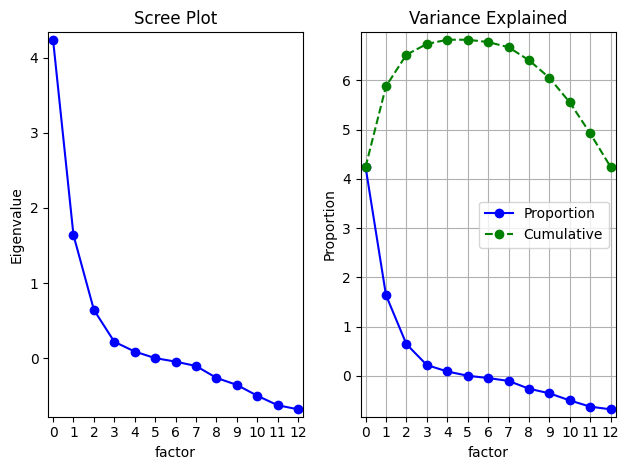

In [7]:
# before doing pca by using factor we can able to figure out how many variables covered how much variance covered.
# in scree plot we can see that and decide how many features we want in PCA
from statsmodels.multivariate.factor import Factor
model = Factor(wine_pca).fit()
model.plot_scree()
plt.grid()
plt.show()

#we can draw insights from scree plot 3 & 4 pca components are covering most variance of dataset.
# in problem statement asked to try first three pca components. so, lets try with first three PCA components.

In [8]:
from statsmodels.multivariate.pca import PCA
pc = PCA(wine_pca, 
         ncomp=3,
         standardize=True,  
         normalize=True,    
         missing=None,
        method='eig')

In [9]:
wines_comp = pc.loadings.T
wines_comp

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
comp_0,-0.144329,0.245188,0.002051,0.239320,-0.141992,-0.394661,-0.422934,0.298533,-0.313429,0.088617,-0.296715,-0.376167,-0.286752
comp_1,0.483652,0.224931,0.316069,-0.010591,0.299634,0.065040,-0.003360,0.028779,0.039302,0.529996,-0.279235,-0.164496,0.364903
comp_2,0.207383,-0.089013,-0.626224,-0.612080,-0.130757,-0.146179,-0.150682,-0.170368,-0.149454,0.137306,-0.085222,-0.166005,0.126746


In [10]:
pca_wines = pc.factors
pca_wines

,comp_0,comp_1,comp_2
0,-0.114600,0.068468,0.010330
1,-0.076341,-0.015814,0.126308
2,-0.086958,0.048911,-0.061259
3,-0.129813,0.130744,0.010982
4,-0.034860,0.041259,-0.126323
...,...,...,...
173,0.116458,0.105126,0.021352
174,0.089902,0.083351,-0.012938
175,0.092524,0.130958,0.058649
176,0.082476,0.108971,0.034325


lets try clustering on wines pca components

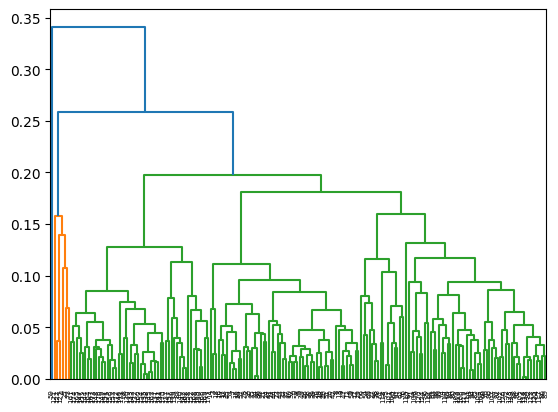

In [11]:
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(pca_wines, method='average'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(pca_wines)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
wine_pca['pca3_hclusterid'] = Clusters
wine_pca.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,pca3_hclusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [13]:
wine_pca.groupby('pca3_hclusterid').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
pca3_hclusterid,,,,,,,,,,,,,
0,13.021579,2.339240,2.353509,19.298246,99.251462,2.282515,2.005439,0.360117,1.589006,5.123158,0.953661,2.597544,751.935673
1,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
2,12.508333,2.486667,2.905000,26.583333,115.666667,2.706667,2.951667,0.425000,1.840000,3.721667,1.050000,3.146667,641.000000


#profiling:
#cluster 0: comparing with three clusters high Alchol,colur and proline group,medium Alcalinty,Magnesium,phenols,Flavanoids,NOnflavanoids,proanthocyanins,dilution mean group.
#cluster 1: comparing with three clusters low Alchol,Alcalinty,Magnesium,phenols,Flavanoids,NOnflavanoids,proanthocyanins,dilution mean group
#cluster 2: medium alcohol but high Alcalinity,,Magnesium,phenols,Flavanoids,NOnflavanoids,proanthocyanins,dilution mean group and medium proline and colur.

#hierarchical clustering with original data

In [17]:
wine1 = wines.drop('Type',axis=1)

In [18]:
#scaling the original data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledWine = scaler.fit_transform(wine1)
scaledWine

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [19]:
scaledWine = pd.DataFrame(scaledWine,columns=wine1.columns)
scaledWine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [20]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(scaledWine)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
wine1['hcluster_id'] = Clusters
wine1.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hcluster_id
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [21]:
wine1.groupby('hcluster_id').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
hcluster_id,,,,,,,,,,,,,
0,13.012299,2.351494,2.361092,19.402299,99.333333,2.284138,2.011437,0.361954,1.592011,5.088851,0.954057,2.601552,747.971264
1,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
2,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000


#profiling
#cluster0: comparing three clusters high Alchol,Malic,color. medium Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoids,proanthocyaninshue,Diluation means group.
#cluster1:low alchol, Malic and all features means are low compare to other groups.
#cluster2: medium alchol,Malic means and high Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoids.proanthocyanins,HUE,diluation.

# first three comp of PCA hierarchical clustering groups and orginal data hierarchical clustering group are quite similar groups.

#K mean on pca_wines

In [22]:
from sklearn.cluster import KMeans
#Build Kmeans_Cluster algorithm with three clusters
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(pca_wines)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [23]:
#Assign clusters to the data set
wine_pca['Kmeans_clusterid'] = clusters_new.labels_

In [24]:
wine_pca1 = wine_pca.drop('pca3_hclusterid', axis =1)

In [25]:
wine_pca1.groupby('Kmeans_clusterid').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Kmeans_clusterid,,,,,,,,,,,,,
0,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,13.686721,2.006066,2.472295,17.495082,108.131148,2.854918,3.009180,0.292295,1.931148,5.482295,1.063607,3.171148,1101.540984
2,12.276324,1.906176,2.222500,19.888235,92.735294,2.237500,2.037500,0.360147,1.593971,3.030882,1.057882,2.773824,514.750000


In [26]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(pca_wines)
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[2.149001135712176,
 1.4184005705745935,
 1.0422951442864243,
 0.8851464103606435,
 0.7633954208349853,
 0.6743185342988075,
 0.615657332563498,
 0.5498812469499283,
 0.5053191318265865]

#plotting elbow plot

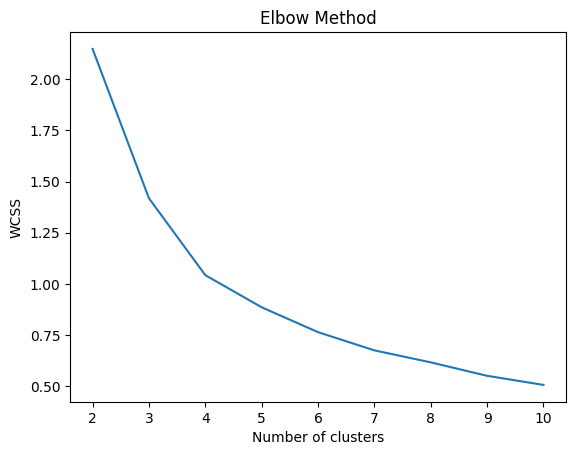

In [27]:
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
#lets try with k=4
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(pca_wines)
wine_pca['Kmeans_clusterid'] = clusters_new.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
wine_pca.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,pca3_hclusterid,Kmeans_clusterid
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0


In [32]:
wine2_pca = wine_pca.drop('pca3_hclusterid',axis=1)
wine2_pca.groupby('Kmeans_clusterid').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Kmeans_clusterid,,,,,,,,,,,,,
0,12.241053,2.192368,2.510526,22.268421,95.552632,2.375000,2.315000,0.384211,1.730526,3.041053,1.051316,2.971842,536.368421
1,13.794717,1.979245,2.440566,16.903774,107.622642,2.872642,3.023585,0.287358,1.961509,5.675849,1.061321,3.143585,1136.396226
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
3,12.457895,1.678421,2.031316,17.828947,93.868421,2.205263,1.944474,0.328684,1.486053,3.266842,1.068842,2.697895,568.052632


#Kmeans clustering with original data

In [38]:
wine_k = wines.drop('Type',axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaledWine = scaled.fit_transform(wine_k)
scaledWine = pd.DataFrame(scaledWine,columns=wine_k.columns)
scaledWine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [42]:
#k=3 kmeans clustering with orginal data 
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaledWine)
wine_k['Kmeans_clusterid'] = clusters_new.labels_
wine_k.groupby('Kmeans_clusterid').mean()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Kmeans_clusterid,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [35]:
#k=3 with pca 
wine_pca1.groupby('Kmeans_clusterid').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Kmeans_clusterid,,,,,,,,,,,,,
0,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,13.686721,2.006066,2.472295,17.495082,108.131148,2.854918,3.009180,0.292295,1.931148,5.482295,1.063607,3.171148,1101.540984
2,12.276324,1.906176,2.222500,19.888235,92.735294,2.237500,2.037500,0.360147,1.593971,3.030882,1.057882,2.773824,514.750000


#kmeans clustering groups also with original data and with first three pca components are same.